In [25]:
#library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import re
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi
from scipy.stats import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [26]:
df = pd.read_csv("Kuesioner Mihu-mihu - Sheet5.csv")
df

,NAMA,NPM,FAKULTAS,JURUSAN,SEMESTER,IPK,IK,JMK,PIK,JMT,HMT,KKM,MMT,MM,MTS,DBDT,MW
0,Fryan Ilham Satriya,24081010209,Fakultas Ilmu Komputer,Informatika,3,3.93,Ya,1,3 = Cukup penting,3,5,Tidak,1,2 = Kurang Berpengaruh,Ya,4 = Berdampak,Ya
1,Najwa Sofia,24083010115,Fakultas Ilmu Komputer,Sains Data,3,3.67,Ya,1,3 = Cukup penting,5,4,Tidak,4,1 = Tidak berpengaruh,Ya,3 = Cukup berdampak,Tidak
2,Sendy Luis Armando,24081010102,Fakultas Ilmu Komputer,Informatika,3,3.50,Tidak,0,3 = Cukup penting,2,1,Ya,2,1 = Tidak berpengaruh,Tidak,2 = Kurang berdampak,Ya
3,Achmad Mukhlis,22082010097,Fakultas Ilmu Komputer,Sistem Informasi,7,3.78,Ya,2,3 = Cukup penting,3,2,Tidak,0,1 = Tidak berpengaruh,Ya,4 = Berdampak,Tidak
4,Hanif Ziva Zavira,22083010078,Fakultas Ilmu Komputer,Sains Data,7,3.93,Tidak,0,2 = Kurang penting,5,3,Ya,3,4 = Berpengaruh,Tidak,4 = Berdampak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Maryati Margaretha Simbolon,24052010096,Fakultas Arsitektur dan Desain,DKV,3,3.00,Tidak,0,3 = Cukup penting,6,4,Ya,0,1 = Tidak berpengaruh,Tidak,4 = Berdampak,Ya
153,Isna Shetia,23082010204,Fakultas Ilmu Komputer,Sistem Informasi,5,3.80,Ya,3,4 = Penting,8,2,Tidak,0,3 = Cukup berpengaruh,Ya,3 = Cukup berdampak,Ya
154,Hizkia Samhan Rezayoshi,24083010019,Fakultas Ilmu Komputer,Sains Data,3,3.80,Ya,1,3 = Cukup penting,3,1,Tidak,2,3 = Cukup berpengaruh,Tidak,3 = Cukup berdampak,Ya
155,Raffi Akbar Ramadhan,24071010121,Fakultas Hukum,Ilmu Hukum,3,3.79,Ya,3,3 = Cukup penting,2,2,Tidak,5,3 = Cukup berpengaruh,Ya,3 = Cukup berdampak,Ya


In [27]:
# drop kolom
df = df.drop(columns=["NAMA", "NPM", "SEMESTER"])

# cek hasil
df.head()

,FAKULTAS,JURUSAN,IPK,IK,JMK,PIK,JMT,HMT,KKM,MMT,MM,MTS,DBDT,MW
0,Fakultas Ilmu Komputer,Informatika,3.93,Ya,1,3 = Cukup penting,3,5,Tidak,1,2 = Kurang Berpengaruh,Ya,4 = Berdampak,Ya
1,Fakultas Ilmu Komputer,Sains Data,3.67,Ya,1,3 = Cukup penting,5,4,Tidak,4,1 = Tidak berpengaruh,Ya,3 = Cukup berdampak,Tidak
2,Fakultas Ilmu Komputer,Informatika,3.50,Tidak,0,3 = Cukup penting,2,1,Ya,2,1 = Tidak berpengaruh,Tidak,2 = Kurang berdampak,Ya
3,Fakultas Ilmu Komputer,Sistem Informasi,3.78,Ya,2,3 = Cukup penting,3,2,Tidak,0,1 = Tidak berpengaruh,Ya,4 = Berdampak,Tidak
4,Fakultas Ilmu Komputer,Sains Data,3.93,Tidak,0,2 = Kurang penting,5,3,Ya,3,4 = Berpengaruh,Tidak,4 = Berdampak,Tidak


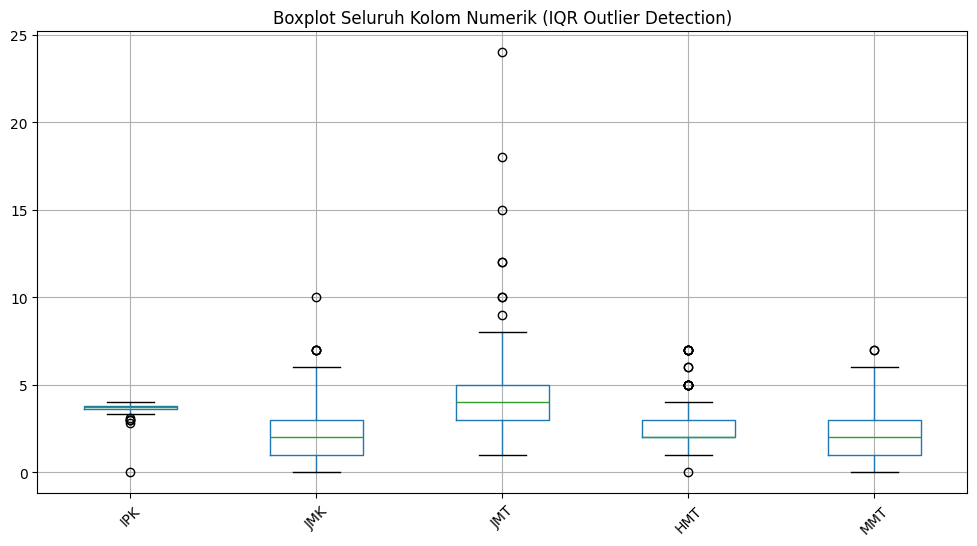

{'IPK': 6, 'JMK': 5, 'JMT': 8, 'HMT': 18, 'MMT': 2}

In [28]:
# Select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Detect outliers using IQR
outlier_info = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outlier_info[col] = len(outliers)

# Boxplot visualization
plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot Seluruh Kolom Numerik (IQR Outlier Detection)")
plt.show()

outlier_info

Kolom yang akan diimputasi: ['IPK', 'JMK', 'JMT', 'HMT', 'MMT']


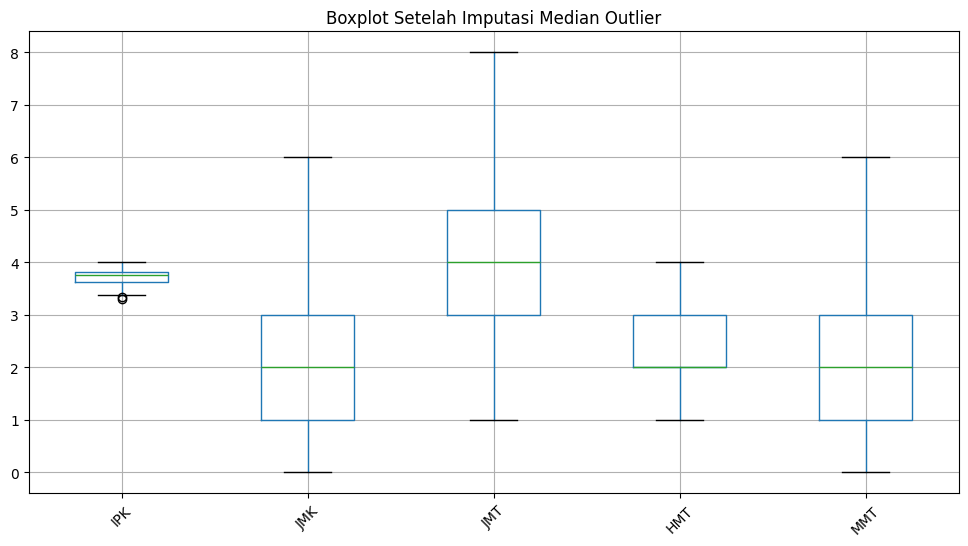

In [29]:
# Ambil kolom yang punya outlier (>0)
outlier_cols = [col for col, count in outlier_info.items() if count > 0]

# Buang kolom SEMESTER jika ada
if "SEMESTER" in outlier_cols:
    outlier_cols.remove("SEMESTER")

print("Kolom yang akan diimputasi:", outlier_cols)

# Imputasi median pada outlier
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    median_value = df[col].median()

    # ganti nilai outlier dengan median
    df[col] = df[col].apply(
        lambda x: median_value if (x < lower or x > upper) else x
    )

# Visualisasi boxplot setelah imputasi
plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot Setelah Imputasi Median Outlier")
plt.show()

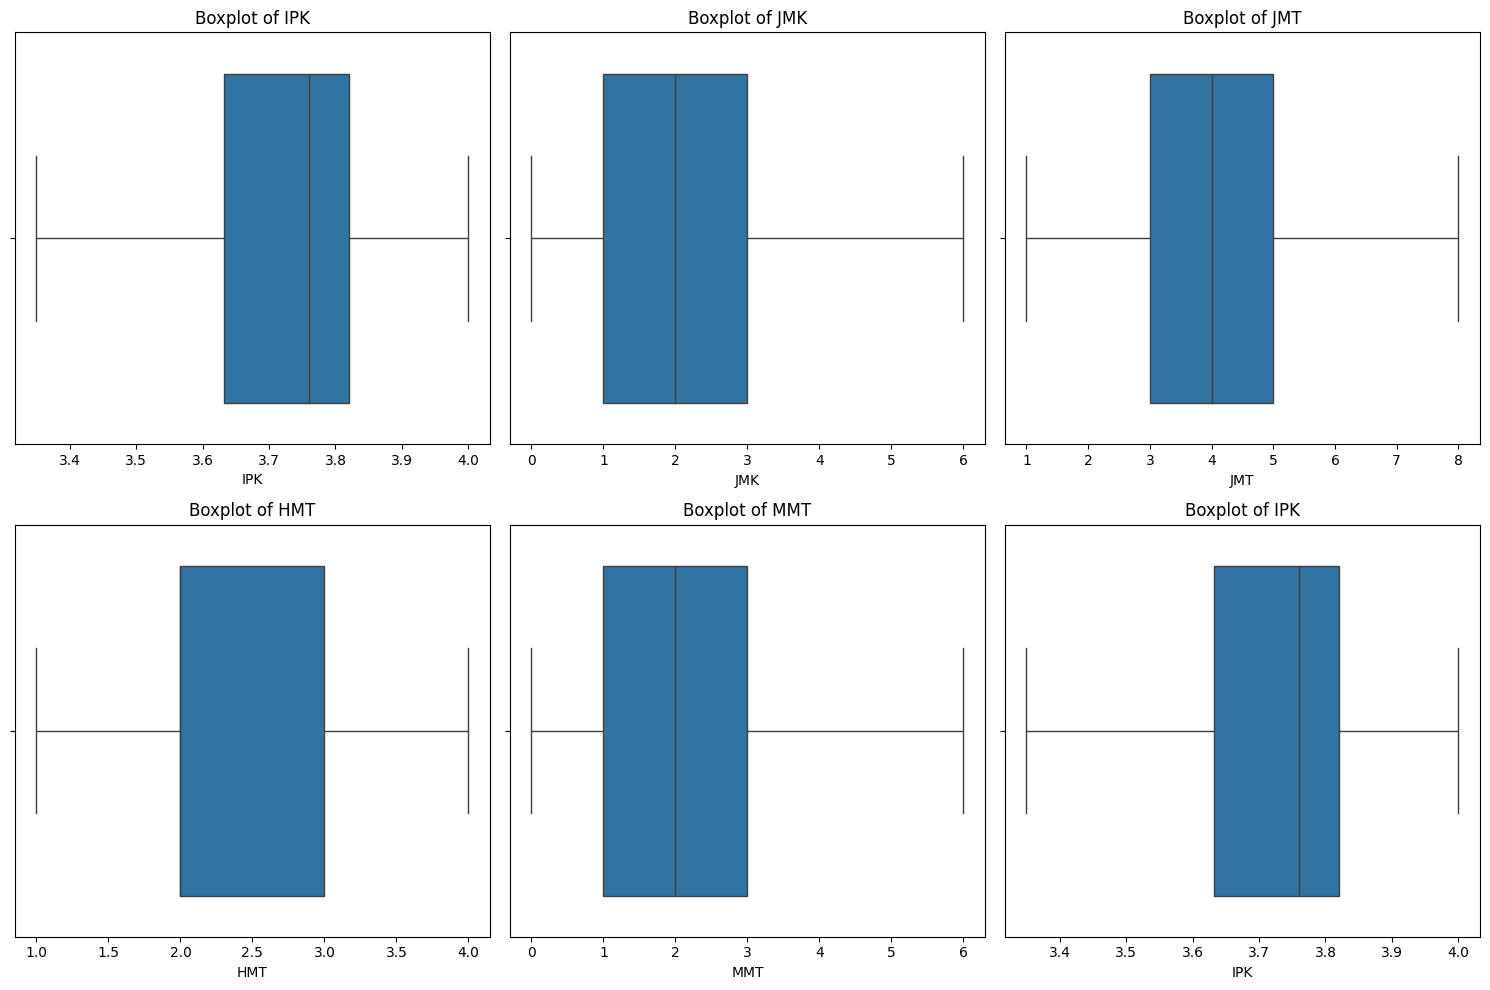

In [30]:
# --- 3. Tangani IPK dengan clipping ---
Q1 = df['IPK'].quantile(0.25)
Q3 = df['IPK'].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

df['IPK'] = df['IPK'].clip(lower=batas_bawah, upper=batas_atas)

# setelah imputasi → buat boxplot semua kolom numerik + IPK
all_numeric = list(outlier_cols) + ['IPK']

plt.figure(figsize=(15, 5 * ((len(all_numeric) + 2) // 3)))

for i, col in enumerate(all_numeric, 1):
    plt.subplot((len(all_numeric) + 2) // 3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [31]:

# 1. Ambil skor 1–5 dari string seperti "3  = Cukup penting"
def ambil_skor_1_5(x):
    if pd.isna(x):
        return pd.NA
    if isinstance(x, str):
        m = re.match(r'\s*(\d)', x)
        if not m:
            return pd.NA
        return int(m.group(1))
    return int(x)

# pastikan tiga variabel ini sudah jadi angka 1–5
for col in ['PIK', 'MM', 'DBDT']:
    df[col + '_skor'] = df[col].apply(ambil_skor_1_5)

# 2. Mapping 3 kategori, disesuaikan per variabel

def kategori_PIK(x):
    if pd.isna(x): return pd.NA
    if x in (1, 2):
        return 'tidak penting'
    elif x == 3:
        return 'cukup penting'
    elif x in (4, 5):
        return 'sangat penting'
    return pd.NA

def kategori_MM(x):
    if pd.isna(x): return pd.NA
    if x in (1, 2):
        return 'tidak berpengaruh'
    elif x == 3:
        return 'cukup berpengaruh'
    elif x in (4, 5):
        return 'sangat berpengaruh'
    return pd.NA

def kategori_DBDT(x):
    if pd.isna(x): return pd.NA
    if x in (1, 2):
        return 'tidak berdampak'
    elif x == 3:
        return 'cukup berdampak'
    elif x in (4, 5):
        return 'sangat berdampak'
    return pd.NA

df['PIK_3kat']  = df['PIK_skor'].apply(kategori_PIK)
df['MM_3kat']   = df['MM_skor'].apply(kategori_MM)
df['DBDT_3kat'] = df['DBDT_skor'].apply(kategori_DBDT)

# optional: jadikan ordered category biar rapi
df['PIK_3kat'] = pd.Categorical(
    df['PIK_3kat'],
    categories=['tidak penting', 'cukup penting', 'sangat penting'],
    ordered=True
)

df['MM_3kat'] = pd.Categorical(
    df['MM_3kat'],
    categories=['tidak berpengaruh', 'cukup berpengaruh', 'sangat berpengaruh'],
    ordered=True
)

df['DBDT_3kat'] = pd.Categorical(
    df['DBDT_3kat'],
    categories=['tidak berdampak', 'cukup berdampak', 'sangat berdampak'],
    ordered=True
)

# Kalau mau cek distribusinya:
for col in ['PIK_3kat', 'MM_3kat', 'DBDT_3kat']:
    print(f'\nDistribusi {col}:')
    print(df[col].value_counts(dropna=False))

df


Distribusi PIK_3kat:
PIK_3kat
cukup penting     78
sangat penting    69
tidak penting     10
Name: count, dtype: int64

Distribusi MM_3kat:
MM_3kat
cukup berpengaruh     81
tidak berpengaruh     42
sangat berpengaruh    34
Name: count, dtype: int64

Distribusi DBDT_3kat:
DBDT_3kat
cukup berdampak     91
sangat berdampak    52
tidak berdampak     14
Name: count, dtype: int64


,FAKULTAS,JURUSAN,IPK,IK,JMK,PIK,JMT,HMT,KKM,MMT,MM,MTS,DBDT,MW,PIK_skor,MM_skor,DBDT_skor,PIK_3kat,MM_3kat,DBDT_3kat
0,Fakultas Ilmu Komputer,Informatika,3.93,Ya,1.0,3 = Cukup penting,3.0,2.0,Tidak,1.0,2 = Kurang Berpengaruh,Ya,4 = Berdampak,Ya,3,2,4,cukup penting,tidak berpengaruh,sangat berdampak
1,Fakultas Ilmu Komputer,Sains Data,3.67,Ya,1.0,3 = Cukup penting,5.0,4.0,Tidak,4.0,1 = Tidak berpengaruh,Ya,3 = Cukup berdampak,Tidak,3,1,3,cukup penting,tidak berpengaruh,cukup berdampak
2,Fakultas Ilmu Komputer,Informatika,3.50,Tidak,0.0,3 = Cukup penting,2.0,1.0,Ya,2.0,1 = Tidak berpengaruh,Tidak,2 = Kurang berdampak,Ya,3,1,2,cukup penting,tidak berpengaruh,tidak berdampak
3,Fakultas Ilmu Komputer,Sistem Informasi,3.78,Ya,2.0,3 = Cukup penting,3.0,2.0,Tidak,0.0,1 = Tidak berpengaruh,Ya,4 = Berdampak,Tidak,3,1,4,cukup penting,tidak berpengaruh,sangat berdampak
4,Fakultas Ilmu Komputer,Sains Data,3.93,Tidak,0.0,2 = Kurang penting,5.0,3.0,Ya,3.0,4 = Berpengaruh,Tidak,4 = Berdampak,Tidak,2,4,4,tidak penting,sangat berpengaruh,sangat berdampak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Fakultas Arsitektur dan Desain,DKV,3.76,Tidak,0.0,3 = Cukup penting,6.0,4.0,Ya,0.0,1 = Tidak berpengaruh,Tidak,4 = Berdampak,Ya,3,1,4,cukup penting,tidak berpengaruh,sangat berdampak
153,Fakultas Ilmu Komputer,Sistem Informasi,3.80,Ya,3.0,4 = Penting,8.0,2.0,Tidak,0.0,3 = Cukup berpengaruh,Ya,3 = Cukup berdampak,Ya,4,3,3,sangat penting,cukup berpengaruh,cukup berdampak
154,Fakultas Ilmu Komputer,Sains Data,3.80,Ya,1.0,3 = Cukup penting,3.0,1.0,Tidak,2.0,3 = Cukup berpengaruh,Tidak,3 = Cukup berdampak,Ya,3,3,3,cukup penting,cukup berpengaruh,cukup berdampak
155,Fakultas Hukum,Ilmu Hukum,3.79,Ya,3.0,3 = Cukup penting,2.0,2.0,Tidak,5.0,3 = Cukup berpengaruh,Ya,3 = Cukup berdampak,Ya,3,3,3,cukup penting,cukup berpengaruh,cukup berdampak


In [32]:
# drop kolom
df = df.drop(columns=["FAKULTAS", "JURUSAN", "PIK", "MM", "DBDT", "PIK_skor", "MM_skor", "DBDT_skor"])

# cek hasil
df.head()

,IPK,IK,JMK,JMT,HMT,KKM,MMT,MTS,MW,PIK_3kat,MM_3kat,DBDT_3kat
0,3.93,Ya,1.0,3.0,2.0,Tidak,1.0,Ya,Ya,cukup penting,tidak berpengaruh,sangat berdampak
1,3.67,Ya,1.0,5.0,4.0,Tidak,4.0,Ya,Tidak,cukup penting,tidak berpengaruh,cukup berdampak
2,3.50,Tidak,0.0,2.0,1.0,Ya,2.0,Tidak,Ya,cukup penting,tidak berpengaruh,tidak berdampak
3,3.78,Ya,2.0,3.0,2.0,Tidak,0.0,Ya,Tidak,cukup penting,tidak berpengaruh,sangat berdampak
4,3.93,Tidak,0.0,5.0,3.0,Ya,3.0,Tidak,Tidak,tidak penting,sangat berpengaruh,sangat berdampak


In [33]:
# Definisi kolom
num_cols = ['IPK', 'HMT', 'JMT', 'MMT']
binary_cols = ['IK', 'JMK', 'KKM', 'MW']
ordinal_cols = ['PIK_3kat', 'MM_3kat', 'DBDT_3kat', 'MTS']

rows = []

# -- Filter kalau ada nama yang tidak ada di df (biar nggak KeyError)
num_cols     = [c for c in num_cols     if c in df.columns]
binary_cols  = [c for c in binary_cols  if c in df.columns]
ordinal_cols = [c for c in ordinal_cols if c in df.columns]

# 1. NUMERIK
# Pastikan numerik (kalau sudah numerik, ini tidak mengubah apa-apa)
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

for col in num_cols:
    rows.append({
        "Variabel": col,
        "Tipe": "Numerik",
        "Kategori": "-",
        "Mean": round(df[col].mean(), 3),
        "Std": round(df[col].std(), 3),
        "Min": df[col].min(),
        "Max": df[col].max(),
        "Frekuensi": "-",
        "Persentase (%)": "-",
        "Modus": "-"
    })

# 2. BINER (Ya/Tidak atau 0/1)
for col in binary_cols:
    freq = df[col].value_counts(dropna=False)
    percent = df[col].value_counts(normalize=True, dropna=False) * 100
    mode = df[col].mode(dropna=True)[0]

    for category in freq.index:
        rows.append({
            "Variabel": col,
            "Tipe": "Biner",
            "Kategori": category,
            "Mean": "-",
            "Std": "-",
            "Min": "-",
            "Max": "-",
            "Frekuensi": int(freq[category]),
            "Persentase (%)": round(percent[category], 2),
            "Modus": mode
        })

# 3. ORDINAL (termasuk MTS)
for col in ordinal_cols:
    freq = df[col].value_counts().sort_index()
    percent = df[col].value_counts(normalize=True).sort_index() * 100
    mode = df[col].mode()[0]

    for category in freq.index:
        rows.append({
            "Variabel": col,
            "Tipe": "Ordinal",
            "Kategori": category,
            "Mean": "-",
            "Std": "-",
            "Min": df[col].min(),
            "Max": df[col].max(),
            "Frekuensi": int(freq[category]),
            "Persentase (%)": round(percent[category], 2),
            "Modus": mode
        })

tabel_gabungan = pd.DataFrame(rows)

# Biar rapi: urutkan berdasarkan Variabel
tabel_gabungan = tabel_gabungan.sort_values(
    by=["Tipe", "Variabel", "Kategori"]
).reset_index(drop=True)

tabel_gabungan


,Variabel,Tipe,Kategori,Mean,Std,Min,Max,Frekuensi,Persentase (%),Modus
0,IK,Biner,Tidak,-,-,-,-,21,13.38,Ya
1,IK,Biner,Ya,-,-,-,-,136,86.62,Ya
2,JMK,Biner,0.0,-,-,-,-,14,8.92,2.0
3,JMK,Biner,1.0,-,-,-,-,43,27.39,2.0
4,JMK,Biner,2.0,-,-,-,-,45,28.66,2.0
5,JMK,Biner,3.0,-,-,-,-,24,15.29,2.0
6,JMK,Biner,4.0,-,-,-,-,12,7.64,2.0
7,JMK,Biner,5.0,-,-,-,-,17,10.83,2.0
8,JMK,Biner,6.0,-,-,-,-,2,1.27,2.0
9,KKM,Biner,Tidak,-,-,-,-,116,73.89,Tidak


In [34]:
cat_ordinal = ['PIK_3kat', 'MM_3kat', 'DBDT_3kat']

for col in cat_ordinal:
    print(f"\n=== {col} ===")
    print(df[col].value_counts().sort_index())  # frek berdasarkan urutan
    print("Mode :", df[col].mode()[0])
    print("Min kategori :", df[col].min())
    print("Max kategori :", df[col].max())



=== PIK_3kat ===
PIK_3kat
tidak penting     10
cukup penting     78
sangat penting    69
Name: count, dtype: int64
Mode : cukup penting
Min kategori : tidak penting
Max kategori : sangat penting

=== MM_3kat ===
MM_3kat
tidak berpengaruh     42
cukup berpengaruh     81
sangat berpengaruh    34
Name: count, dtype: int64
Mode : cukup berpengaruh
Min kategori : tidak berpengaruh
Max kategori : sangat berpengaruh

=== DBDT_3kat ===
DBDT_3kat
tidak berdampak     14
cukup berdampak     91
sangat berdampak    52
Name: count, dtype: int64
Mode : cukup berdampak
Min kategori : tidak berdampak
Max kategori : sangat berdampak


In [35]:
df['Y_MW'] = df['MW'].map({'Ya':1, 'Tidak':0})

num_cols = ['IPK', 'JMK', 'JMT', 'HMT', 'MMT']
cat_cols = ['IK', 'KKM', 'MTS', 'PIK_3kat', 'MM_3kat', 'DBDT_3kat']

df_num = df[num_cols]

df_dummy = pd.get_dummies(df[cat_cols], drop_first=True).astype(int)

df_final = pd.concat([df_num, df_dummy, df['Y_MW']], axis=1)

df_final.head()


,IPK,JMK,JMT,HMT,MMT,IK_Ya,KKM_Ya,MTS_Ya,PIK_3kat_cukup penting,PIK_3kat_sangat penting,MM_3kat_cukup berpengaruh,MM_3kat_sangat berpengaruh,DBDT_3kat_cukup berdampak,DBDT_3kat_sangat berdampak,Y_MW
0,3.93,1.0,3.0,2.0,1.0,1,0,1,1,0,0,0,0,1,1
1,3.67,1.0,5.0,4.0,4.0,1,0,1,1,0,0,0,1,0,0
2,3.50,0.0,2.0,1.0,2.0,0,1,0,1,0,0,0,0,0,1
3,3.78,2.0,3.0,2.0,0.0,1,0,1,1,0,0,0,0,1,0
4,3.93,0.0,5.0,3.0,3.0,0,1,0,0,0,0,1,0,1,0


In [36]:
# 1. Pisahkan Y (target) dan X (prediktor)
y = df_final['Y_MW']
X = df_final.drop(columns=['Y_MW'])

# 2. Tambahkan konstanta (intercept)
X = sm.add_constant(X)

# 3. Fit model logistik
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# 4. Ringkasan dengan CI 90%
print(result.summary2(alpha=0.1))

Optimization terminated successfully.
         Current function value: 0.257652
         Iterations 8
                              Results: Logit
Model:                   Logit               Method:              MLE     
Dependent Variable:      Y_MW                Pseudo R-squared:    0.249   
Date:                    2025-12-15 16:10    AIC:                 110.9027
No. Observations:        157                 BIC:                 156.7464
Df Model:                14                  Log-Likelihood:      -40.451 
Df Residuals:            142                 LL-Null:             -53.836 
Converged:               1.0000              LLR p-value:         0.020626
No. Iterations:          8.0000              Scale:               1.0000  
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.05   0.95] 
--------------------------------------------------------------------------
const                      -

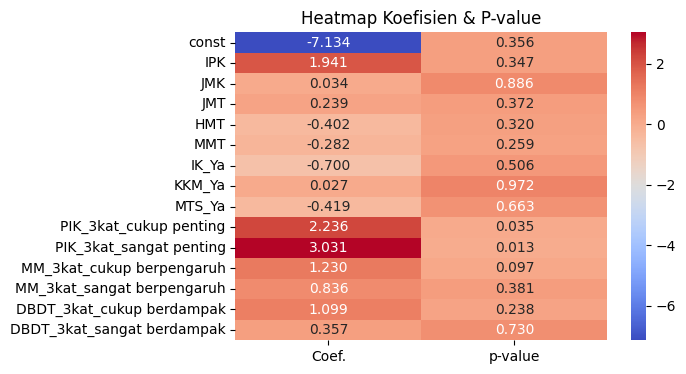

In [37]:
# Ambil tabel koefisien langsung dari summary2
tabel = result.summary2().tables[1]

coef = tabel["Coef."]
pvals = tabel["P>|z|"]

df_coef_heat = pd.DataFrame({
    "Coef.": coef,
    "p-value": pvals
})

plt.figure(figsize=(6, 4))
sns.heatmap(df_coef_heat, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Heatmap Koefisien & P-value")
plt.show()

In [38]:
# 1. Probabilitas prediksi dari model Logit
y_prob = result.predict()             # probabilitas Y=1, bentuknya 1D
y_true = df_final['Y_MW'].values

# 2. Susun data HL
data_hl = pd.DataFrame({
    "y": y_true,
    "p": y_prob
})

# 3. Bagi menjadi 10 grup berdasarkan probabilitas prediksi
data_hl["group"] = pd.qcut(data_hl["p"], 10, duplicates="drop")

# 4. Hitung observed dan expected untuk tiap grup
hl_table = data_hl.groupby("group").agg(
    obs_1=("y", "sum"),      # Y=1
    exp_1=("p", "sum"),      # Expected Y=1
    n=("y", "count")         # total observasi
)

# Tambahkan komponen Y=0
hl_table["obs_0"] = hl_table["n"] - hl_table["obs_1"]
hl_table["exp_0"] = hl_table["n"] - hl_table["exp_1"]

# 5. Hitung HL Statistic
HL_stat = (
    (hl_table["obs_1"] - hl_table["exp_1"])**2 / hl_table["exp_1"] +
    (hl_table["obs_0"] - hl_table["exp_0"])**2 / hl_table["exp_0"]
).sum()

# Derajat bebas
df_hl = 10 - 2     # g - 2

# p-value
p_hl = 1 - chi2.cdf(HL_stat, df_hl)

print("HL Statistic:", HL_stat)
print("Degrees of freedom:", df_hl)
print("p-value:", p_hl)


HL Statistic: 7.633075523721532
Degrees of freedom: 8
p-value: 0.47010732789033827


C:\Users\Maria Dwi\AppData\Local\Temp\ipykernel_18356\3438602313.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hl_table = data_hl.groupby("group").agg(


In [39]:
pvals = result.pvalues
sig_vars = pvals[pvals < 0.1].index.tolist()
sig_vars = [v for v in sig_vars if v != "const"]

print("Variabel signifikan:", sig_vars)

Variabel signifikan: ['PIK_3kat_cukup penting', 'PIK_3kat_sangat penting', 'MM_3kat_cukup berpengaruh']


In [40]:
X_reduced = df_final[sig_vars]
X_reduced = sm.add_constant(X_reduced)

model_reduced = sm.Logit(df_final['Y_MW'], X_reduced)
result_reduced = model_reduced.fit()

Optimization terminated successfully.
         Current function value: 0.284311
         Iterations 7


In [41]:
print("AIC (reduced):", result_reduced.aic)
print("BIC (reduced):", result_reduced.bic)


AIC (reduced): 97.2735203642416
BIC (reduced): 109.49850358563484


In [51]:
# Ambil tabel koefisien dari summary2
tabel = result.summary2().tables[1]

# (opsional) ambil variabel signifikan aja
sig = tabel[tabel['P>|z|'] < 0.1].copy()

# hitung Odds Ratio (TANPA CI)
sig['OR'] = np.exp(sig['Coef.'])

# rapihin
sig = sig.sort_values('OR')

sig[['Coef.', 'P>|z|', 'OR']]


,Coef.,P>|z|,OR
MM_3kat_cukup berpengaruh,1.230055,0.096776,3.421417
PIK_3kat_cukup penting,2.235937,0.035445,9.355239
PIK_3kat_sangat penting,3.031422,0.013271,20.726692


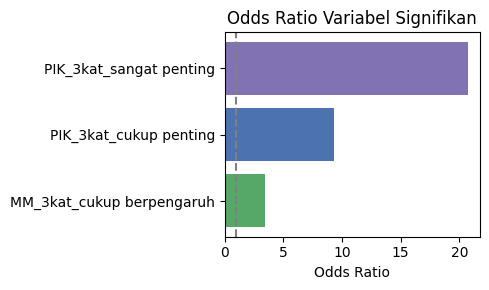

In [76]:
plt.figure(figsize=(5, 3))

colors = ['#55A868', '#4C72B0', '#8172B3']  # hijau–biru–ungu
plt.barh(sig.index, sig['OR'], color=colors)

plt.axvline(1, linestyle='--', color='gray')
plt.xlabel('Odds Ratio')
plt.title('Odds Ratio Variabel Signifikan')

plt.tight_layout()
plt.show()

In [78]:

# 1. Log-likelihood masing-masing model
ll_full = result.llf
ll_red  = result_reduced.llf

# 2. Jumlah parameter (lebih aman pakai jumlah koefisien)
k_full = len(result.params)
k_red  = len(result_reduced.params)

# 3. Statistik LR
LR_stat = -2 * (ll_red - ll_full)
df_lr   = k_full - k_red

p_lr = 1 - chi2.cdf(LR_stat, df_lr)

print("Log-likelihood full   :", ll_full)
print("Log-likelihood reduced:", ll_red)
print("LR statistic           :", LR_stat)
print("df                     :", df_lr)
print("p-value LR             :", p_lr)


Log-likelihood full   : -40.45133575945546
Log-likelihood reduced: -44.6367601821208
LR statistic           : 8.370848845330684
df                     : 11
p-value LR             : 0.679748825277555


In [80]:
hasil_wald = {}

for var in sig_vars:
    test = result.wald_test(f"{var} = 0")
    hasil_wald[var] = {
        "chi2": float(test.statistic),   # statistik Wald (χ²)
        "df": 1,                         # 1 parameter diuji → df = 1
        "pvalue": float(test.pvalue)     # p-value
    }

wald_df = pd.DataFrame(hasil_wald).T

# deteksi otomatis kolom p-value (jaga-jaga namanya beda)
pcol = wald_df.filter(regex='p', axis=1).columns[0]
wald_df['Sig_10%'] = wald_df[pcol] < 0.10

wald_df


C:\Users\Maria Dwi\anaconda3\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
C:\Users\Maria Dwi\AppData\Local\Temp\ipykernel_18356\1339448824.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "chi2": float(test.statistic),   # statistik Wald (χ²)


,chi2,df,pvalue,Sig_10%
PIK_3kat_cukup penting,4.423598,1.0,0.035445,True
PIK_3kat_sangat penting,6.132559,1.0,0.013271,True
MM_3kat_cukup berpengaruh,2.757891,1.0,0.096776,True


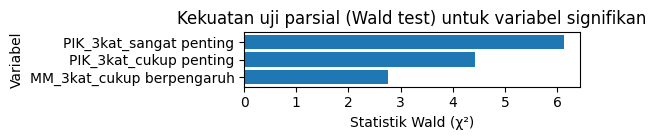

In [82]:


# Ambil hanya variabel signifikan
wald_sig = wald_df[wald_df['Sig_10%']].copy()

# Urutkan berdasarkan chi-square
wald_sig = wald_sig.sort_values('chi2')

plt.figure(figsize=(6, 0.5*len(wald_sig)))
plt.barh(wald_sig.index, wald_sig['chi2'])
plt.xlabel('Statistik Wald (χ²)')
plt.ylabel('Variabel')
plt.title('Kekuatan uji parsial (Wald test) untuk variabel signifikan')
plt.tight_layout()
plt.show()


In [87]:
# Ambil semua variabel independen (kecuali Y)
X = df_final.drop(columns=['Y_MW'])

# Pastikan semuanya numerik
X = X.astype(float)

# Tambahkan konstanta untuk VIF
X_const = sm.add_constant(X)

# Hitung VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

# BUANG konstanta
vif_data = vif_data[vif_data["Variable"] != "const"]

vif_data


,Variable,VIF
1,IPK,1.093556
2,JMK,1.357745
3,JMT,1.162620
4,HMT,1.091233
5,MMT,1.149568
6,IK_Ya,1.492427
7,KKM_Ya,1.165961
8,MTS_Ya,1.135262
9,PIK_3kat_cukup penting,5.691650
10,PIK_3kat_sangat penting,6.090074


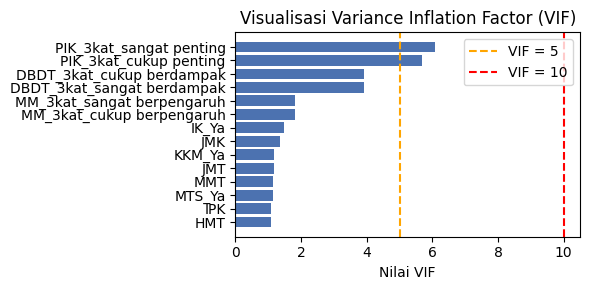

In [89]:
import matplotlib.pyplot as plt

vif_plot = vif_data.sort_values("VIF")

plt.figure(figsize=(6, 3))
plt.barh(vif_plot["Variable"], vif_plot["VIF"], color="#4C72B0")

plt.axvline(5, linestyle="--", color="orange", label="VIF = 5")
plt.axvline(10, linestyle="--", color="red", label="VIF = 10")

plt.xlabel("Nilai VIF")
plt.title("Visualisasi Variance Inflation Factor (VIF)")
plt.legend()
plt.tight_layout()
plt.show()